**EDA-3 Assignment Solutions**

For this assignment we will be using the Amazon Sales Data which contains information on 1K+ Amazon products, including their ratings, reviews, and other details.


In [ ]:
##IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot') # Use stylesheet for plots
#plt.style.use('fivethirtyeight')
#pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', None)

%matplotlib inline

In [ ]:

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

file_path = '/content/drive/MyDrive/Datasets /amazon.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
data.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
# Basic EDA: Checking for missing values, data types, and duplicates

# Summary of the dataset
data.info()

# Check for missing values
missing_values = data.isnull().sum()

# Check for duplicates
duplicates = data.duplicated().sum()

# Display results
missing_values, duplicates


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

(product_id             0
 product_name           0
 category               0
 discounted_price       0
 actual_price           0
 discount_percentage    0
 rating                 0
 rating_count           2
 about_product          0
 user_id                0
 user_name              0
 review_id              0
 review_title           0
 review_content         0
 img_link               0
 product_link           0
 dtype: int64,
 0)

In [ ]:
# Cleaning the data

# Removing ₹ and commas, converting price columns to numeric
data['discounted_price'] = data['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
data['actual_price'] = data['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Removing % from discount_percentage and converting to numeric
data['discount_percentage'] = data['discount_percentage'].str.replace('%', '').astype(float)

# Converting rating to numeric
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Converting rating_count to numeric (removing commas and handling missing values)
data['rating_count'] = data['rating_count'].str.replace(',', '').astype(float)

# Handling missing values in rating_count by filling with 0
data['rating_count'].fillna(0, inplace=True)

# Splitting category into separate subcategories
data['main_category'] = data['category'].str.split('|').str[0]

# Confirming data cleaning
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1465 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

**Questions with their solutions**

1. What is the average rating for each product category?

In [ ]:
# Grouping the data by main category and calculating the average rating
category_avg_rating = data.groupby('main_category')['rating'].mean().sort_values(ascending=False)

# Resetting the index and renaming columns for better readability
category_avg_rating = category_avg_rating.reset_index()
category_avg_rating.columns = ['Category', 'Average Rating']

# Displaying the results
print("Average Rating for Each Product Category:")
category_avg_rating


Average Rating for Each Product Category:


,Category,Average Rating
0,OfficeProducts,4.309677
1,Toys&Games,4.300000
2,HomeImprovement,4.250000
3,Computers&Accessories,4.154967
4,Electronics,4.081749
5,Home&Kitchen,4.040716
6,Health&PersonalCare,4.000000
7,MusicalInstruments,3.900000
8,Car&Motorbike,3.800000


2. What are the top rating_count products by category?

In [ ]:
# Sorting products by category and rating_count in descending order
top_products_by_category = (
    data.sort_values(by=['main_category', 'rating_count'], ascending=[True, False])
    .groupby('main_category')
    .head(3)[['main_category', 'product_name', 'rating_count', 'rating']]
)

# Displaying the results
print("Top Products by Category Based on Rating Count:")
top_products_by_category


Top Products by Category Based on Rating Count:


,main_category,product_name,rating_count,rating
1157,Car&Motorbike,Reffair AX30 [MAX] Portable Air Purifier for C...,1118.0,3.8
588,Computers&Accessories,SanDisk Cruzer Blade 32GB USB Flash Drive,253105.0,4.3
718,Computers&Accessories,SanDisk Ultra Dual 64 GB USB 3.0 OTG Pen Drive...,189104.0,4.3
143,Computers&Accessories,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,179692.0,4.2
12,Electronics,AmazonBasics Flexible Premium HDMI Cable (Blac...,426973.0,4.4
47,Electronics,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",426973.0,4.4
65,Electronics,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",426973.0,4.4
1247,Health&PersonalCare,Dr Trust Electronic Kitchen Digital Scale Weig...,3663.0,4.0
1028,Home&Kitchen,Pigeon Polypropylene Mini Handy and Compact Ch...,270563.0,4.1
1022,Home&Kitchen,Pigeon by Stovekraft Amaze Plus Electric Kettl...,123365.0,3.9


3. What is the distribution of discounted prices vs. actual prices?

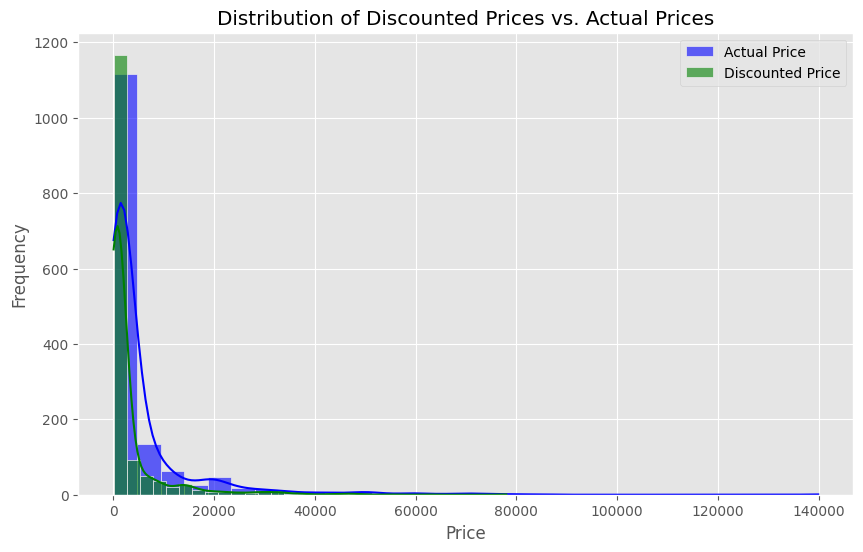

In [ ]:
# Plotting the distribution of actual and discounted prices
plt.figure(figsize=(10, 6))
sns.histplot(data['actual_price'], bins=30, label='Actual Price', color='blue', kde=True, alpha=0.6)
sns.histplot(data['discounted_price'], bins=30, label='Discounted Price', color='green', kde=True, alpha=0.6)
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()


4. How does the average discount percentage vary across categories?

In [ ]:
# Grouping the data by main category and calculating the average discount percentage
average_discount_by_category = data.groupby('main_category')['discount_percentage'].mean().sort_values(ascending=False)

# Resetting the index and renaming columns for better readability
average_discount_by_category = average_discount_by_category.reset_index()
average_discount_by_category.columns = ['Category', 'Average Discount (%)']

# Displaying the results
print("Average Discount Percentage by Category:")
average_discount_by_category


Average Discount Percentage by Category:


,Category,Average Discount (%)
0,HomeImprovement,57.500000
1,Computers&Accessories,54.024283
2,Health&PersonalCare,53.000000
3,Electronics,50.828897
4,MusicalInstruments,46.000000
5,Car&Motorbike,42.000000
6,Home&Kitchen,40.120536
7,OfficeProducts,12.354839
8,Toys&Games,0.000000


5. What are the most popular product names?

In [ ]:
# Sorting products by rating_count in descending order to find the most popular products
most_popular_products = (
    data[['product_name', 'rating_count']]
    .sort_values(by='rating_count', ascending=False)
    .head(10)
)

# Displaying the results
print("Most Popular Product Names:")
most_popular_products


Most Popular Product Names:


,product_name,rating_count
12,AmazonBasics Flexible Premium HDMI Cable (Blac...,426973.0
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",426973.0
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",426973.0
684,AmazonBasics Flexible Premium HDMI Cable (Blac...,426972.0
400,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0
352,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0
584,boAt BassHeads 100 in-Ear Wired Headphones wit...,363711.0
370,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",313836.0
371,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",313836.0
473,"Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...",313832.0


6. What are the most popular product keywords?

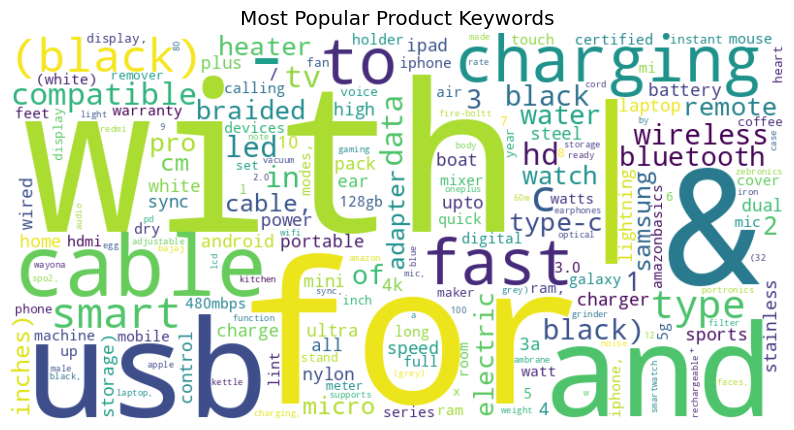

Top Product Keywords:
    Keyword  Frequency
0      with        751
1       for        672
2         |        457
3         &        432
4       usb        377
5       and        330
6     cable        320
7         -        220
8  charging        219
9        to        218


In [ ]:
from collections import Counter
from wordcloud import WordCloud

# Tokenizing words in product names and counting occurrences
keywords = ' '.join(data['product_name'].str.lower())
word_count = Counter(keywords.split())

# Generating a word cloud for visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count)

# Displaying the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Popular Product Keywords')
plt.show()

# Displaying top 10 keywords
top_keywords = pd.DataFrame(word_count.most_common(10), columns=['Keyword', 'Frequency'])
print("Top Product Keywords:")
print(top_keywords)


7. What are the most popular product reviews?

In [ ]:
# Identifying the products with the highest number of reviews
most_popular_reviews = data[['product_name', 'review_title', 'rating_count']].sort_values(by='rating_count', ascending=False).head(10)

# Displaying the results
print("Most Popular Product Reviews:")
most_popular_reviews


Most Popular Product Reviews:


,product_name,review_title,rating_count
12,AmazonBasics Flexible Premium HDMI Cable (Blac...,"It's quite good and value for money,Works well...",426973.0
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...","It's quite good and value for money,Works well...",426973.0
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","It's quite good and value for money,Works well...",426973.0
684,AmazonBasics Flexible Premium HDMI Cable (Blac...,"It's quite good and value for money,Works well...",426972.0
400,boAt Bassheads 100 in Ear Wired Earphones with...,"Best value for money,HEAD PHONE POUCH NOT RECE...",363713.0
352,boAt Bassheads 100 in Ear Wired Earphones with...,"Best value for money,HEAD PHONE POUCH NOT RECE...",363713.0
584,boAt BassHeads 100 in-Ear Wired Headphones wit...,"Best value for money,HEAD PHONE POUCH NOT RECE...",363711.0
370,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...","Best phone for below normal use,Good mobile fo...",313836.0
371,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...","Best phone for below normal use,Good mobile fo...",313836.0
473,"Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...","Best phone for below normal use,Good mobile fo...",313832.0


8. What is the correlation between discounted_price and rating?

In [ ]:
# Calculating the correlation between discounted price and rating
correlation = data['discounted_price'].corr(data['rating'])

# Displaying the result
print(f"Correlation between Discounted Price and Rating: {correlation}")


Correlation between Discounted Price and Rating: 0.12033741712288548


9. What are the Top 5 categories based on the highest ratings?

In [ ]:
# Sorting categories by average rating in descending order
top_categories_by_rating = data.groupby('main_category')['rating'].mean().sort_values(ascending=False).head(5)

# Resetting the index and renaming columns for better readability
top_categories_by_rating = top_categories_by_rating.reset_index()
top_categories_by_rating.columns = ['Category', 'Average Rating']

# Displaying the results
print("Top 5 Categories Based on Highest Ratings:")
top_categories_by_rating


Top 5 Categories Based on Highest Ratings:


,Category,Average Rating
0,OfficeProducts,4.309677
1,Toys&Games,4.300000
2,HomeImprovement,4.250000
3,Computers&Accessories,4.154967
4,Electronics,4.081749


10. Identify any potential areas for improvement or optimization based on the data analysis.

In [ ]:
# Insights based on previous analyses:
# 1. Categories with low ratings may need improvement in product quality.
low_rated_categories = data.groupby('main_category')['rating'].mean().sort_values().head(5)
print("Categories with Lowest Average Ratings:")
print(low_rated_categories)

# 2. Products with high actual prices and low discounts could be optimized for better sales.
high_price_low_discount = data[(data['actual_price'] > data['actual_price'].median()) &
                               (data['discount_percentage'] < data['discount_percentage'].median())]
print("High Price and Low Discount Products:")
high_price_low_discount[['product_name', 'actual_price', 'discount_percentage']].head(10)


Categories with Lowest Average Ratings:
main_category
Car&Motorbike          3.800000
MusicalInstruments     3.900000
Health&PersonalCare    4.000000
Home&Kitchen           4.040716
Electronics            4.081749
Name: rating, dtype: float64
High Price and Low Discount Products:


,product_name,actual_price,discount_percentage
16,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,24999.0,44.0
19,LG 80 cm (32 inches) HD Ready Smart LED TV 32L...,21990.0,39.0
20,Duracell USB Lightning Apple Certified (Mfi) B...,1799.0,46.0
22,Samsung 80 cm (32 Inches) Wondertainment Serie...,22900.0,41.0
24,Acer 80 cm (32 inches) I Series HD Ready Andro...,19990.0,42.0
26,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,19999.0,25.0
38,OnePlus 126 cm (50 inches) Y Series 4K Ultra H...,45999.0,28.0
41,Mi 108 cm (43 inches) Full HD Android LED TV 4...,34999.0,43.0
50,TP-Link AC600 600 Mbps WiFi Wireless Network U...,2199.0,45.0
53,VW 80 cm (32 inches) Frameless Series HD Ready...,12999.0,46.0
